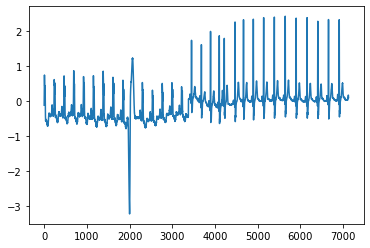

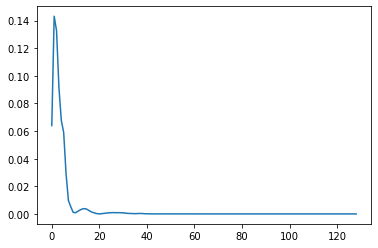

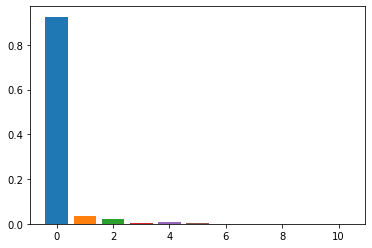

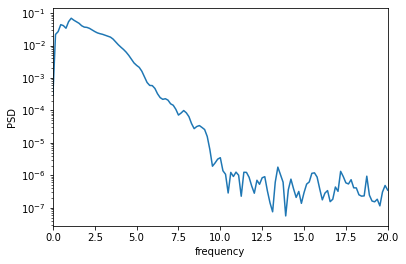

In [51]:

from scipy import signal
import matplotlib.pyplot as plt

# read original data file: ecg.txt
# then visualise the data 

train = []
fp = open('ecg.txt', 'r')

for line in fp:
    
    line = line.strip('\n\r')
    cols = line.split('\t')
    val = float(cols[1])
    train.append(val)
    
plt.plot(train)
plt.show()

wd = train[0:400]
f, pxx_den = signal.welch(wd, 40)

plt.plot(pxx_den)
plt.show()

# compute the spectral power of the signal
# and, save it into the file

window = 400
dimension = 10

fout = open('p.train', 'w')
for i in range(0, len(train) - window, window):
    
    wd = train[i : i + window]
    f, pxx_den = signal.welch(wd, window / 10.0)
    
    tmp = {}
    p = 0
    psum = 0
    
    for fd in f:
        binpos = int(fd)
        if not binpos in tmp:
            tmp[binpos] = 0
        tmp[binpos] += pxx_den[p]
        psum += pxx_den[p]
        p += 1

    p = 0
    for binpos in tmp:
        pavg = tmp[binpos] / psum
        if p != 0:
            fout.write(',')
        fout.write('%.3f' % pavg)
        if p > dimension:
            break
        p += 1
        if i == 0:
            plt.bar(binpos, pavg)
            
    fout.write('\n')
fout.close()
plt.show()

# draw plot
plt.semilogy(f, pxx_den)
plt.xlim([0, 20])
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.show()
